<a href="https://colab.research.google.com/github/dhanashree1496/Dataviz2/blob/master/Data__visualization_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [6]:
uploaded = files.upload()

Saving wine.csv to wine (1).csv


In [0]:
import io
data= pd.read_csv(io.StringIO(uploaded['wine.csv'].decode('utf-8')))

In [41]:
data.head(6)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


# Installation of Libraries:


In [0]:
import pandas as pd
import os
import seaborn as sns
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


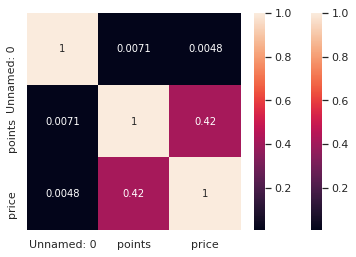

In [73]:
heat = data.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.show()

# Cleaning of data:

In [0]:
df1=data.drop(["Unnamed: 0"],axis=1)

In [80]:
df1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## Insights of dataset :

First five country with highests wine review

In [47]:
df1.country.value_counts().head()

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

##Bar Chart:
Bar charts are arguably the simplest data visualization. They map categories to numbers. In our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number).

In [48]:
countries_list = pd.DataFrame(data.country.value_counts(dropna = True)).iloc[0:10]
countries_list['Index'] = list(range(0,10))
countries_list['Country_Name'] = countries_list.index.values
countries_list.set_index('Index',inplace = True)
countries_list.columns = ['Number Of Wines Produced','Country']
#Top 10 Wine Producing Countries
countries_list

,Number Of Wines Produced,Country
Index,,
0,54504,US
1,22093,France
2,19540,Italy
3,6645,Spain
4,5691,Portugal
5,4472,Chile
6,3800,Argentina
7,3345,Austria
8,2329,Australia


Text(0.5, 0, 'Number Of Wines Produced')

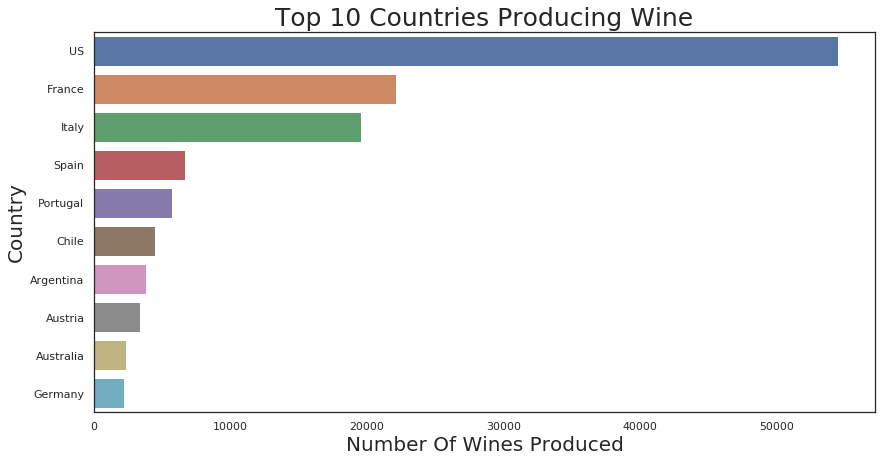

In [49]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Country", x="Number Of Wines Produced", data=countries_list)
plt.title("Top 10 Countries Producing Wine",fontsize = 25)
plt.ylabel("Country",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

In [50]:
winery_list = pd.DataFrame(data.winery.value_counts(dropna = True)).iloc[0:10]
winery_list['Index'] = list(range(0,10))
winery_list['Winery_Name'] = winery_list.index.values
winery_list.set_index('Index',inplace = True)
winery_list.columns = ['Number Of Wines Produced','Winery']
#Top 10 Wine Producing Wineries
winery_list

,Number Of Wines Produced,Winery
Index,,
0,222,Wines & Winemakers
1,218,Testarossa
2,215,DFJ Vinhos
3,211,Williams Selyem
4,199,Louis Latour
5,196,Georges Duboeuf
6,194,Chateau Ste. Michelle
7,164,Concha y Toro
8,159,Columbia Crest


Text(0.5, 0, 'Number Of Wines Produced')

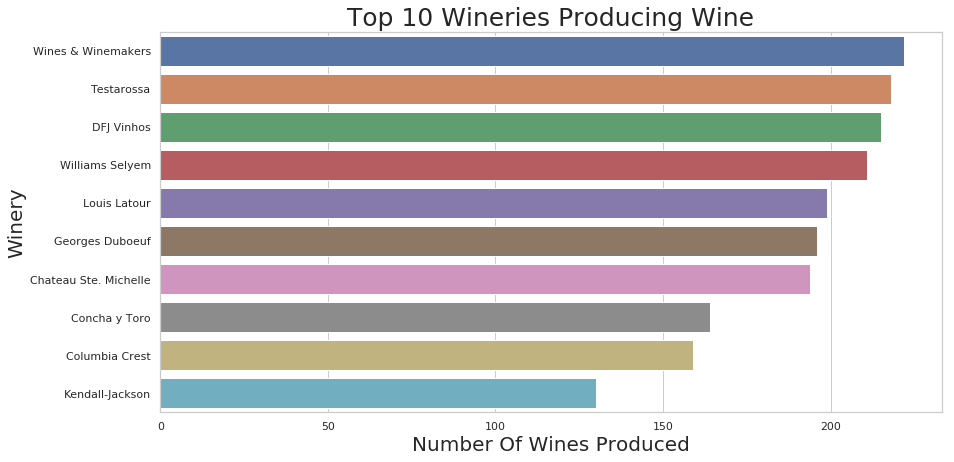

In [51]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
sns.barplot(y="Winery", x="Number Of Wines Produced", data=winery_list)
plt.title("Top 10 Wineries Producing Wine",fontsize = 25)
plt.ylabel("Winery",fontsize = 20)
plt.xlabel("Number Of Wines Produced",fontsize = 20)

In [52]:
taster_list = pd.DataFrame(data.taster_name.value_counts(dropna = True)).iloc[0:10]
taster_list['Index'] = list(range(0,10))
taster_list['Taster_Name'] = taster_list.index.values
taster_list.set_index('Index',inplace = True)
taster_list.columns = ['Number Of Wines Tasted','Taster Name']
#Top 10 Wine Tasters
taster_list

,Number Of Wines Tasted,Taster Name
Index,,
0,25514,Roger Voss
1,15134,Michael Schachner
2,10776,Kerin O’Keefe
3,9537,Virginie Boone
4,9532,Paul Gregutt
5,6332,Matt Kettmann
6,5147,Joe Czerwinski
7,4966,Sean P. Sullivan
8,4415,Anna Lee C. Iijima


Text(0.5, 0, 'taster name')

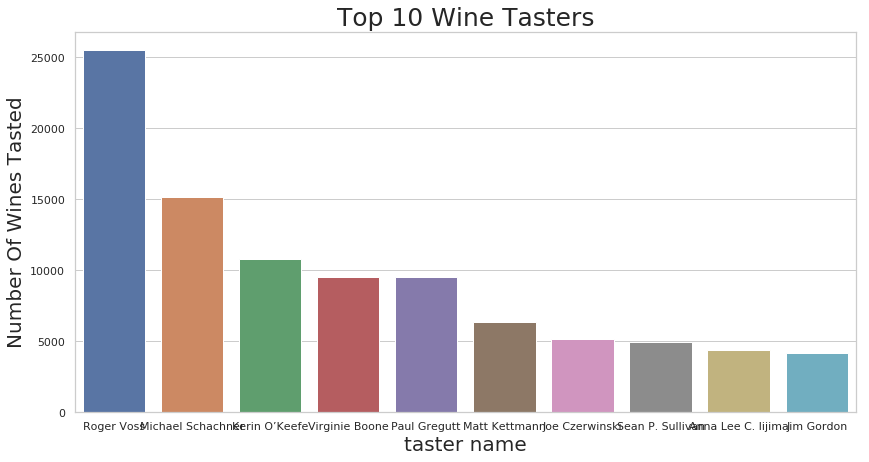

In [53]:
fig, ax = plt.subplots(figsize=(14,7))
sns.set(style="whitegrid")
ax = sns.barplot(y="Number Of Wines Tasted", x="Taster Name", data=taster_list)
plt.title("Top 10 Wine Tasters",fontsize = 25)
plt.ylabel("Number Of Wines Tasted",fontsize = 20)
plt.xlabel("taster name",fontsize = 20)

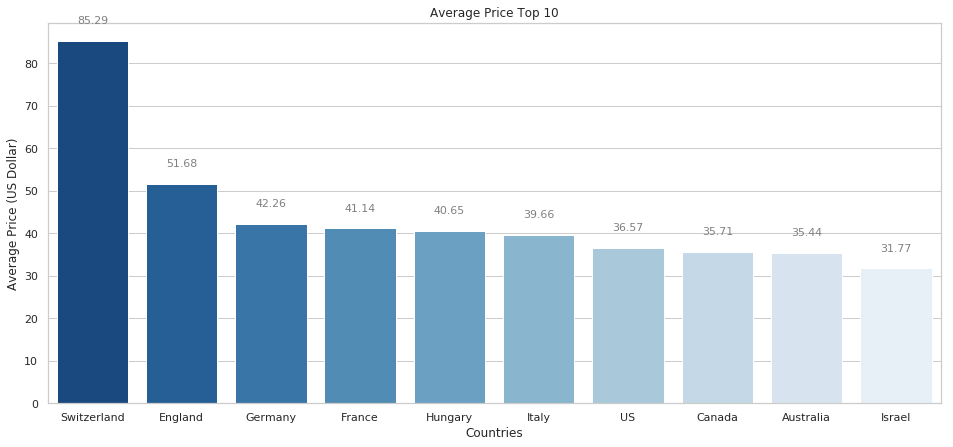

In [54]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=data.groupby("country").mean().sort_values(by="price",ascending=False).price.index[:10], 
                y=data.groupby("country").mean().sort_values(by="price",ascending=False).price.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Price (US Dollar)")
plt.title("Average Price Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

## Line Chart: 
A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

# Visualising Distribution Of Wines In Various Price Groups
Group 1 : 0 - 30

Group 2 : 30 - 80

Group 3 : 80 - 150

Group 4 : 150 - 500

Group 5 : Above 500

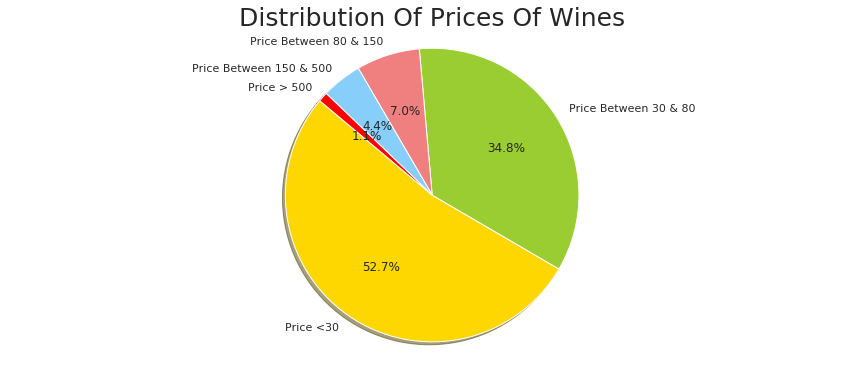

In [55]:
def price_group(pr):
    if(pr>0 and pr<30):
        return 1
    elif(pr >= 30 and pr < 80):
        return 2
    elif(pr >= 80 and pr < 150):
        return 3
    elif(pr >= 150 and pr < 500):
        return 4
    else:
        return 5
      
      
data['Price_Group'] = data['price'].apply(price_group)
counts = list(data['Price_Group'].value_counts())


labels = ['Price <30','Price Between 30 & 80','Price Between 80 & 150','Price Between 150 & 500','Price > 500']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize = (15,6)) 
plt.pie(counts,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution Of Prices Of Wines",fontsize = 25)
plt.axis('equal')
plt.show()


In [82]:
data.variety.value_counts()

fig = {
  "data": [
    {
      "values": data.variety.value_counts().values[:10],
      "labels": data.variety.value_counts().index[:10],
      "name": "Variaty",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    ],
  "layout": {
        "title":"Variaty",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Grapes",
                "x": 0.5,
                "y": 0.5
            },
        ]
    }
}

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
                                
configure_plotly_browser_state()
 

iplot(fig)

## Histogram:
A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

This histogram shows us the frequencies of wine price. we are only looking for the wines frequencies which has lower price than 200. The maximum price of wine is less than 25. 

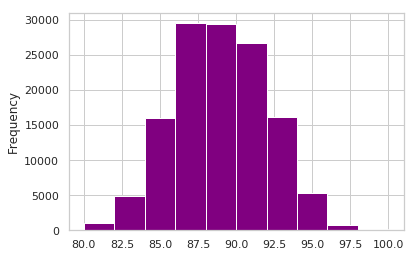

In [56]:
data['points'].plot.hist(color='purple')

Now we were trying to findout the maximun points given to the wins. As we can see in above histogram, maximum points are between 85 to 92.5. And 87.5 points are given most of the wines.

## Scatter Plot:
The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space.

Correlation between wine price and ratings.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


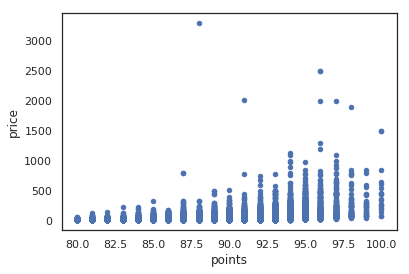

In [57]:
sns.set(style="white", color_codes=True)
%matplotlib inline

data.plot(kind="scatter", x="points", y="price")


There are very few high priced wines in the dataset.There are some low cost wines for whichreviewers have given a 100 point rating - we might look at the reviewers density for them.

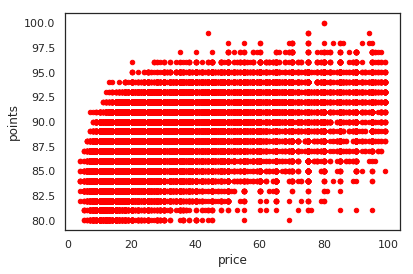

In [58]:
data[data['price'] < 100].plot.scatter(x='price',
                                    y='points',
                                    color='red')

This plot shows us that price and points are weakly correlated: that is, that more expensive wines do generally earn more points when reviewed.

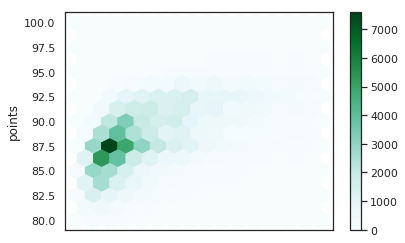

In [84]:
data[data['price'] < 100].plot.hexbin(x='price',
                                       y='points', 
                                       gridsize=15)

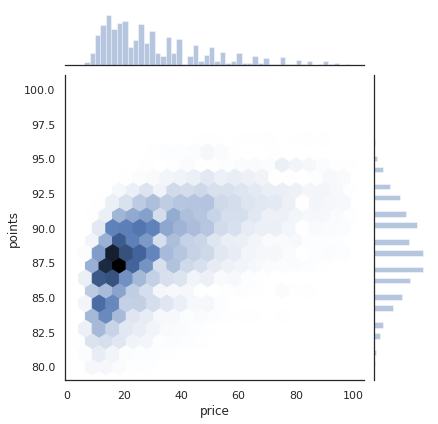

In [60]:
sns.jointplot(x='price', y='points', data=data[data['price'] < 100], kind='hex', 
              gridsize=20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning:

Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.



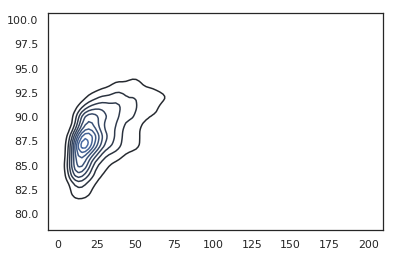

In [61]:
sns.kdeplot(data[data['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

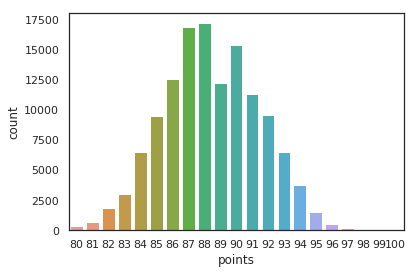

In [62]:
sns.countplot(data['points'])

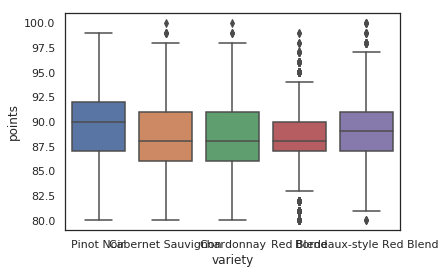

In [63]:
df2 = data[data.variety.isin(data.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df2
)

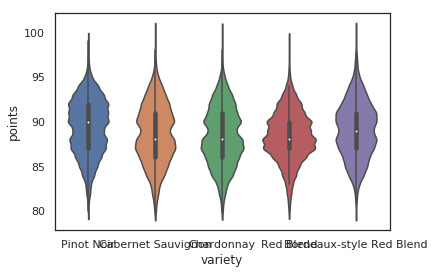

In [64]:
sns.violinplot(
    x='variety',
    y='points',
    data=data[data.variety.isin(data.variety.value_counts()[:5].index)]
)

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:146: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.



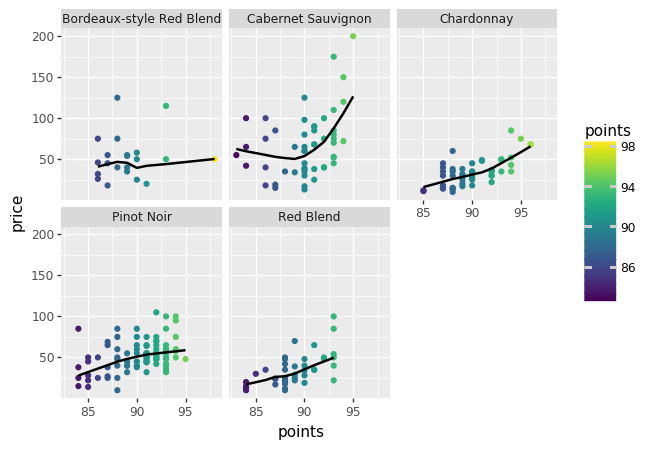

<ggplot: (8772900031962)>

In [65]:
from plotnine import *

top_wines = data[data['variety'].isin(data['variety'].value_counts().head(5).index)]

df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

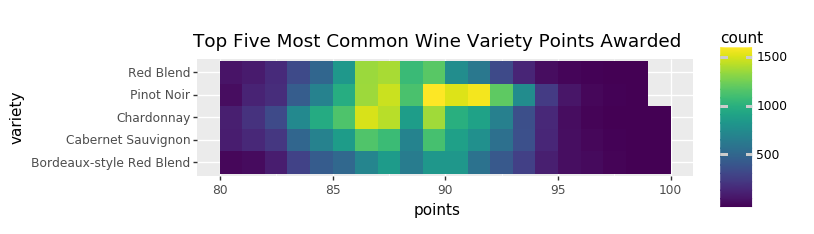

<ggplot: (8772899930916)>

In [66]:
(ggplot(top_wines)
         + aes('points', 'variety')
         + geom_bin2d(bins=20)
         + coord_fixed(ratio=1)
         + ggtitle("Top Five Most Common Wine Variety Points Awarded")
)

In [67]:
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [0]:
pip install plotly

In [0]:
pip install chart-studio

In [70]:

 
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)


data= pd.read_csv(io.StringIO(uploaded['wine.csv'].decode('utf-8')))

df = data.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
                                
configure_plotly_browser_state()

iplot([go.Surface(z=v)])


